In [1]:
# 라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import joblib
import warnings

warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format='retina'

In [2]:
# 맑은 고딕으로 그래프 한글 지정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

In [3]:
# 파일 불러오기
apart = pd.read_excel('train.xlsx')

In [4]:
apart.head()

,단지코드,단지명,총세대수,전용면적별세대수,지역,준공일자,건물형태,난방방식,승강기설치여부,단지내주차면수,전용면적,공용면적,임대보증금,임대료,실차량수
0,C0001,엘에이치 서초4단지,78,35,서울,20131204,계단식,개별가스난방,전체동 설치,120,51.89,19.2603,50758000,620370,109
1,C0001,엘에이치 서초4단지,78,43,서울,20131204,계단식,개별가스난방,전체동 설치,120,59.93,22.2446,63166000,665490,109
2,C0002,LH삼성아파트,35,26,서울,20130801,복도식,개별가스난방,전체동 설치,47,27.75,16.5375,63062000,458640,35
3,C0002,LH삼성아파트,35,9,서울,20130801,복도식,개별가스난방,전체동 설치,47,29.08,17.3302,63062000,481560,35
4,C0003,강남LH8단지,88,7,서울,20131023,계단식,개별가스난방,전체동 설치,106,59.47,21.9462,72190000,586540,88


In [5]:
print(apart['지역'].value_counts())
print(apart['건물형태'].value_counts())
print(apart['난방방식'].value_counts())
print(apart['승강기설치여부'].value_counts())

경기      294
대구경북    192
광주전남    157
서울      144
부산울산    135
대전충남    105
경남       49
강원       28
전북       17
충북       15
제주       14
세종        7
Name: 지역, dtype: int64
복도식    623
계단식    321
혼합식    191
Name: 건물형태, dtype: int64
개별가스난방    568
지역난방      333
지역가스난방    120
중앙가스난방     44
중앙난방       11
중앙유류난방      3
지역유류난방      2
개별유류난방      1
Name: 난방방식, dtype: int64
전체동 설치    1030
미설치         18
일부동 설치      11
Name: 승강기설치여부, dtype: int64


In [6]:
apart.shape

(1157, 15)

In [7]:
apart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1157 entries, 0 to 1156
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   단지코드      1157 non-null   object 
 1   단지명       1157 non-null   object 
 2   총세대수      1157 non-null   int64  
 3   전용면적별세대수  1157 non-null   int64  
 4   지역        1157 non-null   object 
 5   준공일자      1157 non-null   int64  
 6   건물형태      1135 non-null   object 
 7   난방방식      1082 non-null   object 
 8   승강기설치여부   1059 non-null   object 
 9   단지내주차면수   1157 non-null   int64  
 10  전용면적      1157 non-null   float64
 11  공용면적      1157 non-null   float64
 12  임대보증금     1157 non-null   int64  
 13  임대료       1157 non-null   int64  
 14  실차량수      1157 non-null   int64  
dtypes: float64(2), int64(7), object(6)
memory usage: 135.7+ KB


In [8]:
apart.describe()

,총세대수,전용면적별세대수,준공일자,단지내주차면수,전용면적,공용면적,임대보증금,임대료,실차량수
count,1157.000000,1157.000000,1.157000e+03,1157.000000,1157.000000,1157.000000,1.157000e+03,1.157000e+03,1157.000000
mean,659.075194,163.691443,2.008667e+07,682.261884,51.565584,20.562360,2.850789e+07,2.259409e+05,650.762316
std,456.110643,166.766358,6.777985e+04,473.331805,18.243315,5.164405,2.890687e+07,1.768102e+05,390.573462
min,1.000000,1.000000,1.992010e+07,10.000000,17.590000,5.850000,0.000000e+00,0.000000e+00,21.000000
25%,315.000000,44.000000,2.005031e+07,308.000000,39.480000,16.997400,1.379700e+07,1.177400e+05,320.000000
50%,595.000000,112.000000,2.010042e+07,629.000000,46.900000,20.384700,1.997300e+07,1.842900e+05,626.000000
75%,918.000000,229.000000,2.013121e+07,911.000000,59.810000,23.722500,3.375300e+07,2.634400e+05,894.000000
max,2289.000000,1258.000000,2.022071e+07,4553.000000,139.350000,42.760000,2.549220e+08,1.058030e+06,1657.000000


In [9]:
apart.isnull().sum()

단지코드         0
단지명          0
총세대수         0
전용면적별세대수     0
지역           0
준공일자         0
건물형태        22
난방방식        75
승강기설치여부     98
단지내주차면수      0
전용면적         0
공용면적         0
임대보증금        0
임대료          0
실차량수         0
dtype: int64

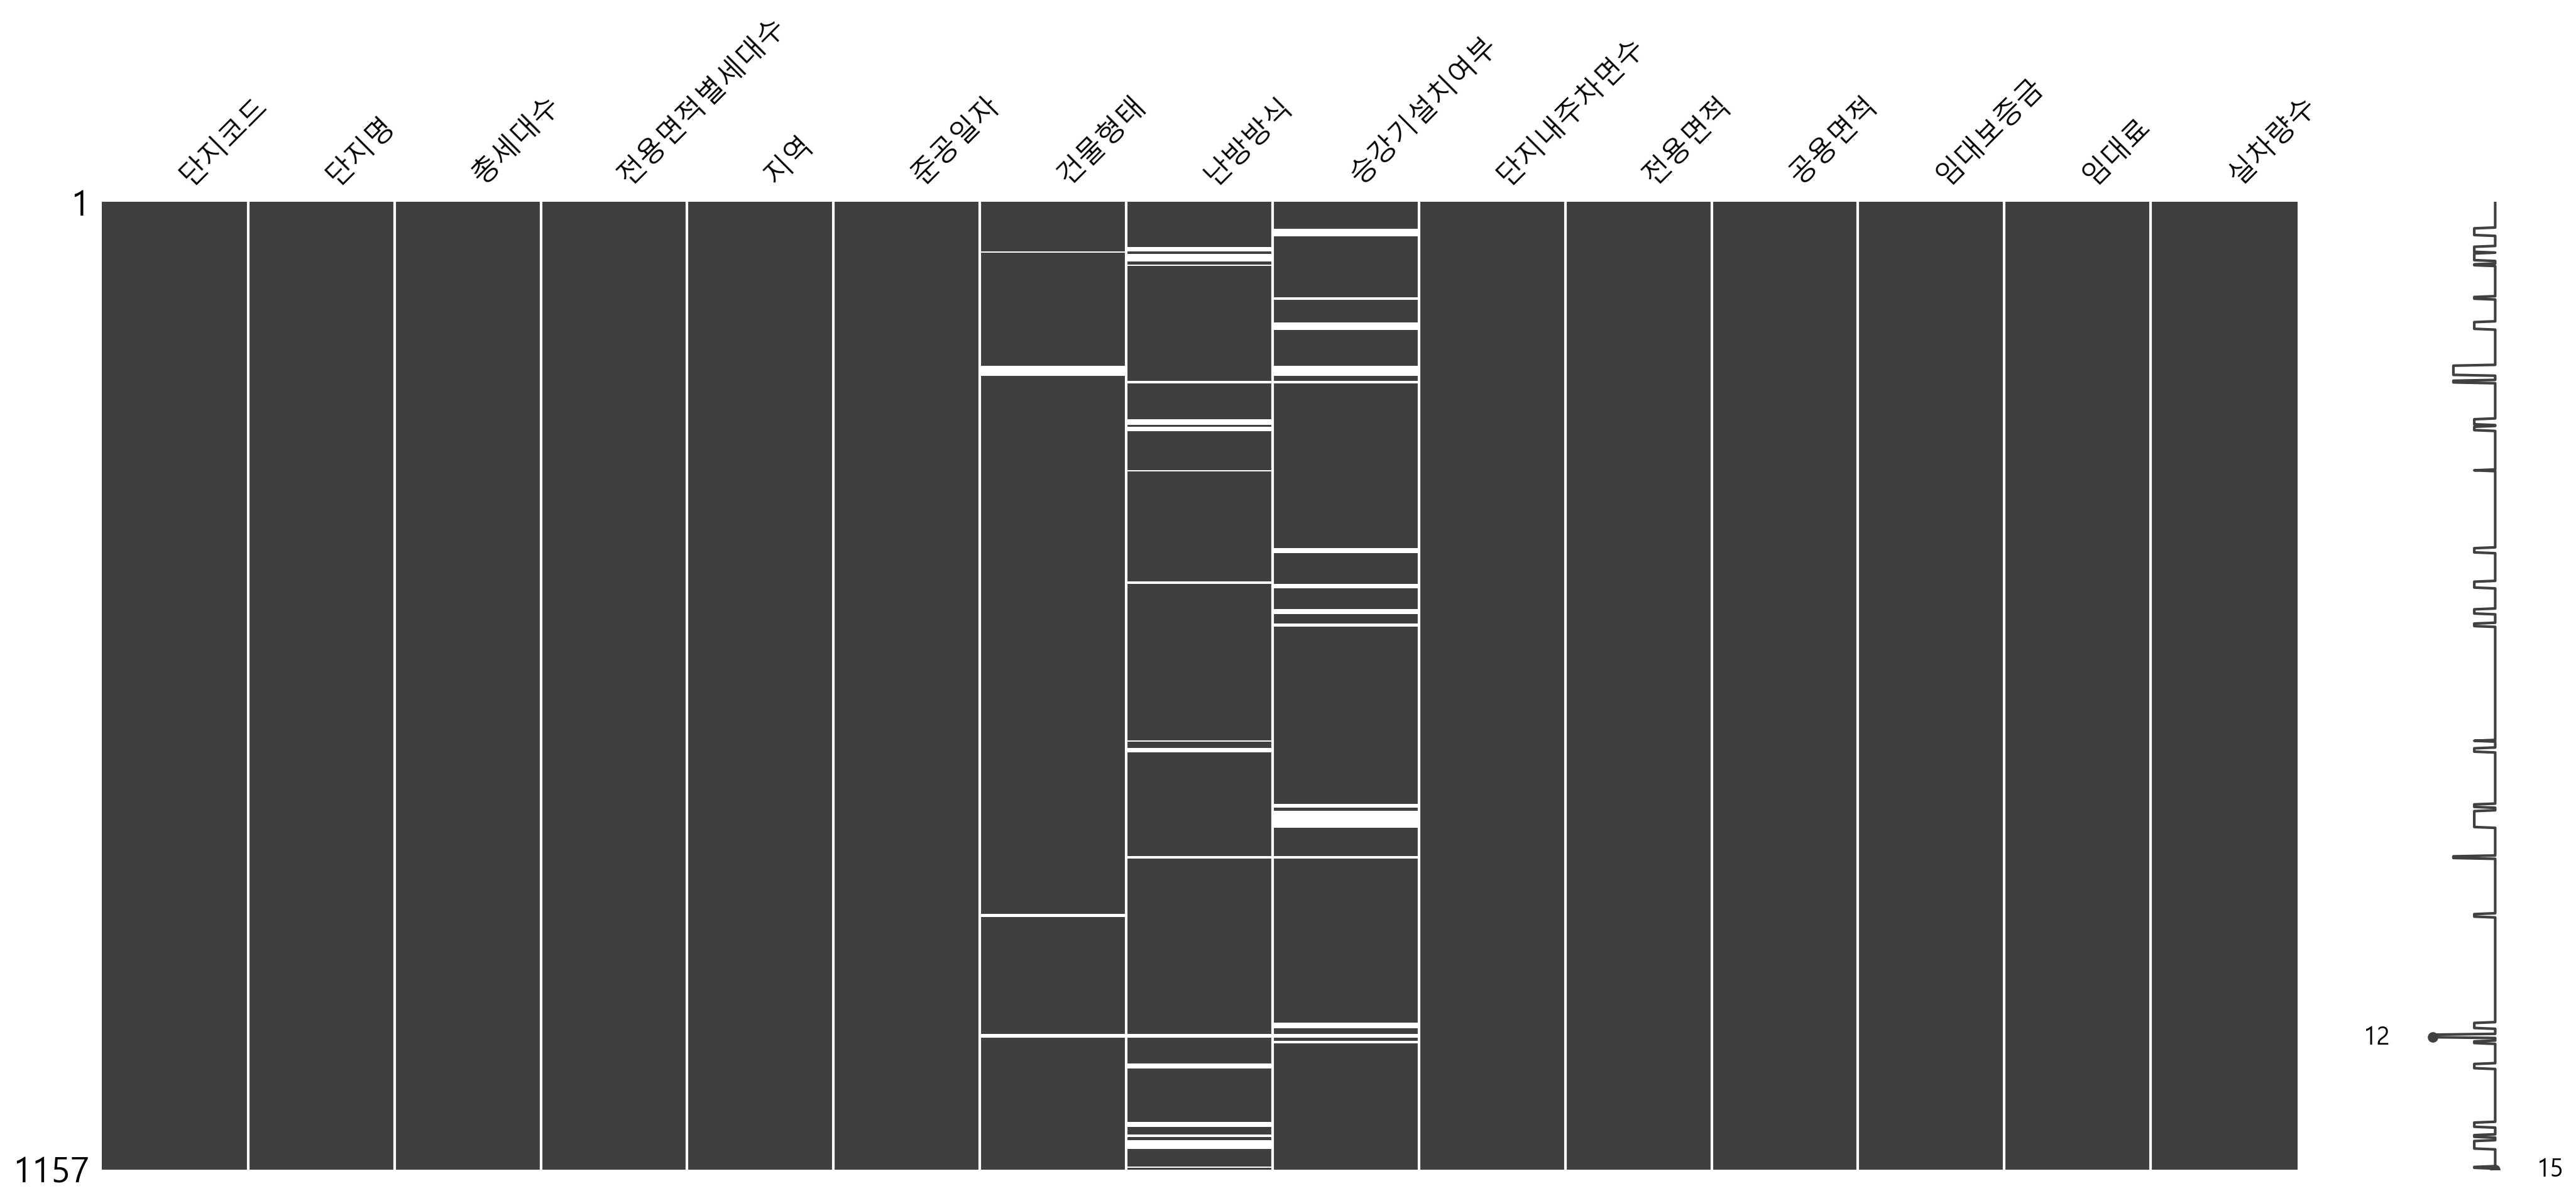

In [10]:
import missingno as msno

msno.matrix(apart)
plt.show()

In [11]:
# 결측치 처리
apart['건물형태'] = apart['건물형태'].fillna(apart['건물형태'].mode()[0])
apart['난방방식'] = apart['난방방식'].fillna(apart['난방방식'].mode()[0])
apart['승강기설치여부'] = apart['승강기설치여부'].fillna(apart['승강기설치여부'].mode()[0])

In [12]:
apart[['건물형태', '난방방식', '승강기설치여부']].isnull().sum()

건물형태       0
난방방식       0
승강기설치여부    0
dtype: int64

In [13]:
apart['준공연도'] = apart['준공일자'].astype(str).str[:4].astype(int)

In [14]:
apart['총면적'] = (apart['전용면적'] + apart['공용면적']) * apart['전용면적별세대수']

In [15]:
apart.drop(columns=['단지명', '단지내주차면수', '준공일자'], inplace=True)

- 단지별 데이터를 갖는 data01 데이터프레임 
  - '단지코드', '총세대수', '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부', '실차량수'
  - data01 데이터프레임의 중복행 제거, 인덱스 초기화

In [16]:
data01 = apart[['단지코드', '총세대수', '지역', '준공연도', '건물형태', '난방방식', '승강기설치여부', '실차량수']]
data01 = data01.drop_duplicates()

In [17]:
data01 = data01.reset_index(drop=True)

- 상세 데이터를 갖는 data02 데이터프레임
  - '단지코드', '총면적', '전용면적별세대수', '전용면적', '공용면적', '임대보증금', '임대료'
  - 단지코드별 총면적 합 집계 
  - 전용면적을 의미있는 구간으로 나누어 피벗 형태로 집계
  - 단지코드별 임대보증금, 임대료 평균을 집계
  - 단지코드, 전용면적구간별 전용면적별세대수 합을 집계

In [18]:
data02 = apart[['단지코드', '총면적', '전용면적별세대수', '전용면적', '공용면적', '임대보증금', '임대료']]

In [19]:
df_area = data02.groupby('단지코드')['총면적'].sum().reset_index()
df_area.head()

,단지코드,총면적
0,C0001,6023.7683
1,C0002,1569.1668
2,C0003,7180.1396
3,C0004,47058.9273
4,C0006,543.0268


In [20]:
# right=False 오른쪽 값 포함 x
bins = [10, 30, 40, 50, 60, 70, 80, 200]
data02['전용면적구간'] = pd.cut(data02['전용면적'], bins=bins, right=False)
data02.head()

,단지코드,총면적,전용면적별세대수,전용면적,공용면적,임대보증금,임대료,전용면적구간
0,C0001,2490.2605,35,51.89,19.2603,50758000,620370,"[50, 60)"
1,C0001,3533.5078,43,59.93,22.2446,63166000,665490,"[50, 60)"
2,C0002,1151.4750,26,27.75,16.5375,63062000,458640,"[10, 30)"
3,C0002,417.6918,9,29.08,17.3302,63062000,481560,"[10, 30)"
4,C0003,569.9134,7,59.47,21.9462,72190000,586540,"[50, 60)"


In [21]:
temp = data02.groupby(['단지코드', '전용면적구간'])['전용면적별세대수'].sum().reset_index()
temp

,단지코드,전용면적구간,전용면적별세대수
0,C0001,"[10, 30)",0
1,C0001,"[30, 40)",0
2,C0001,"[40, 50)",0
3,C0001,"[50, 60)",78
4,C0001,"[60, 70)",0
...,...,...,...
2410,C2349,"[40, 50)",0
2411,C2349,"[50, 60)",0
2412,C2349,"[60, 70)",0
2413,C2349,"[70, 80)",0


In [22]:
df_pivot = temp.pivot(index='단지코드', columns='전용면적구간', values='전용면적별세대수').reset_index()

In [23]:
# 세대 수에 따라 임대보증금과 임대료가 다를 수 있기 때문에, 단순 평균 대신 세대 수를 고려한 가중 평균
df_rent_t = data02.groupby(['단지코드','전용면적별세대수'], as_index=False)[['임대보증금','임대료']].mean()
df_rent_t['임대보증금'] = df_rent_t['임대보증금'] * df_rent_t['전용면적별세대수']
df_rent_t['임대료'] = df_rent_t['임대료'] * df_rent_t['전용면적별세대수']
df_rent_t1 = df_rent_t.groupby(['단지코드'], as_index=False)[['임대보증금','임대료']].sum()
df_rent_t2 = df_rent_t.groupby(['단지코드'], as_index=False)[['전용면적별세대수']].sum()

df_rent_t = pd.merge(df_rent_t1, df_rent_t2, on='단지코드')
df_rent_t['임대보증금'] = df_rent_t['임대보증금'] / df_rent_t['전용면적별세대수']
df_rent_t['임대료'] = df_rent_t['임대료'] / df_rent_t['전용면적별세대수']
df_rent_t.drop(columns='전용면적별세대수', inplace=True)
df_rent_t.head()

,단지코드,임대보증금,임대료
0,C0001,5.759831e+07,645243.846154
1,C0002,6.306200e+07,464533.714286
2,C0003,7.219000e+07,586540.000000
3,C0004,9.158473e+07,877880.272537
4,C0006,5.446315e+07,330212.000000


In [24]:
tmp = pd.merge(data01, df_area, on='단지코드', how='left')
tmp = pd.merge(tmp, df_pivot, on='단지코드', how='left')
df = pd.merge(tmp, df_rent_t, on='단지코드', how='left')

In [25]:
df.columns = df.columns.astype(str)
df.rename(columns={
    '[10, 30)': '면적10_30',
    '[30, 40)': '면적30_40',
    '[40, 50)': '면적40_50',
    '[50, 60)': '면적50_60',
    '[60, 70)': '면적60_70',
    '[70, 80)': '면적70_80',
    '[80, 200)': '면적80_200'
}, inplace=True)

In [26]:
mapping = {
    '경기': '수도권',
    '대구경북': '비수도권',
    '광주전남': '비수도권',
    '서울': '수도권',
    '부산울산': '비수도권',
    '대전충남': '비수도권',
    '경남': '비수도권',
    '강원': '비수도권',  
    '전북': '비수도권',
    '충북': '비수도권',
    '제주': '비수도권',
    '세종': '비수도권'  
}

In [27]:
df['지역'] = df['지역'].map(mapping)

In [28]:
df['난방방식'].value_counts()

개별가스난방    210
지역난방       84
지역가스난방     30
중앙가스난방     14
중앙난방        3
중앙유류난방      2
개별유류난방      1
지역유류난방      1
Name: 난방방식, dtype: int64

In [29]:
df['난방방식'] = df['난방방식'].replace({
    '개별가스난방': '개별',
    '개별유류난방': '개별',
    '지역난방': '지역',
    '지역가스난방': '지역',
    '지역유류난방': '지역',
    '중앙가스난방': '중앙',
    '중앙난방': '중앙',
    '중앙유류난방': '중앙'
})

In [30]:
df['승강기설치여부'].value_counts()

전체동 설치    333
미설치        10
일부동 설치      2
Name: 승강기설치여부, dtype: int64

In [31]:
df['승강기설치여부'] = df['승강기설치여부'].replace({
    '전체동 설치': 1,
    '미설치': 0,
    '일부동 설치': 0
})

In [32]:
df['승강기설치여부'].value_counts()

1    333
0     12
Name: 승강기설치여부, dtype: int64

In [33]:
df.drop(columns=['단지코드'], inplace=True)

In [34]:
df['임대보증금_대비_임대료_비율'] = np.where(df['임대보증금'] > 0, 
                                    df['임대료'] / df['임대보증금'], 0)

In [35]:
df = pd.get_dummies(df, columns=['건물형태', '난방방식', '지역'])

In [36]:
df.head()

,총세대수,준공연도,승강기설치여부,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,...,임대료,임대보증금_대비_임대료_비율,건물형태_계단식,건물형태_복도식,건물형태_혼합식,난방방식_개별,난방방식_중앙,난방방식_지역,지역_비수도권,지역_수도권
0,78,2013,1,109,6023.7683,0,0,0,78,0,...,645243.846154,0.011202,1,0,0,1,0,0,0,1
1,35,2013,1,35,1569.1668,35,0,0,0,0,...,464533.714286,0.007366,0,1,0,1,0,0,0,1
2,88,2013,1,88,7180.1396,0,0,0,88,0,...,586540.000000,0.008125,1,0,0,1,0,0,0,1
3,477,2014,1,943,47058.9273,0,0,0,150,0,...,877880.272537,0.009585,0,1,0,0,0,1,0,1
4,15,2013,1,21,543.0268,15,0,0,0,0,...,330212.000000,0.006063,0,1,0,1,0,0,0,1


- 임대료, 임대보증금이 0인 경우: 이상치로 간주 -> 제거
- 총 세대수의 3배보다 실차량수가 많은 데이터: 이상치로 간주 -> 제거 

In [37]:
def plotMaker(target, column):
    plt.figure(figsize = (12,4))
    plt.subplot(1,2,1)
    sns.histplot(data = target, x = column, kde = True)

    plt.subplot(1,2,2)
    plt.boxplot(target[column], vert = False )
    plt.xlabel(column)

    plt.show()

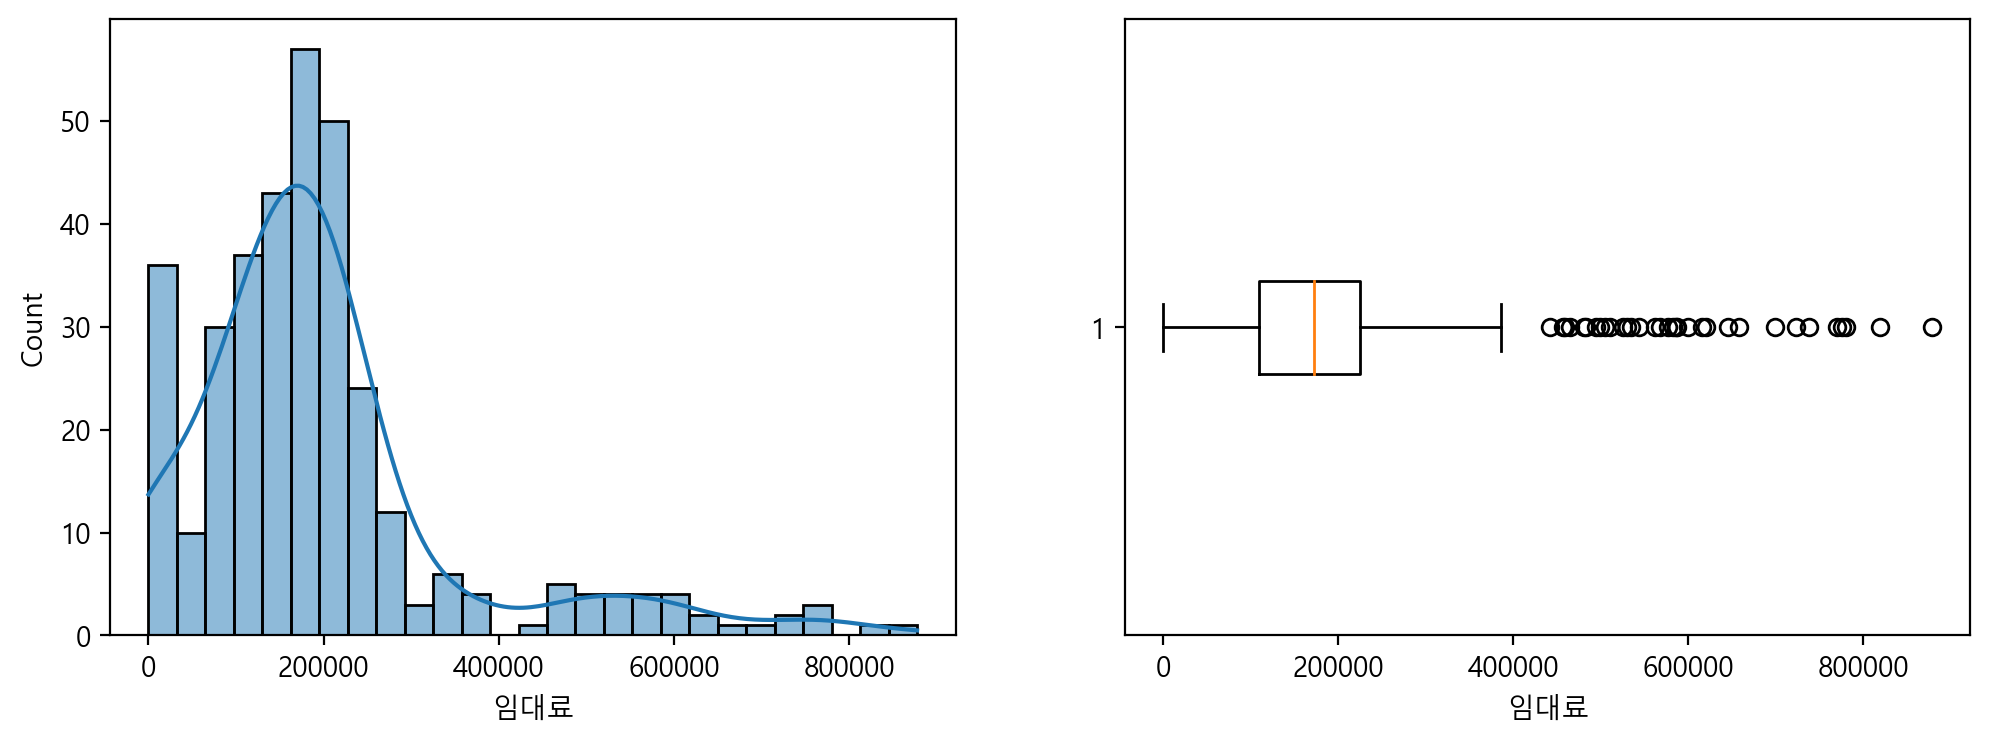

In [38]:
plotMaker(df, '임대료')

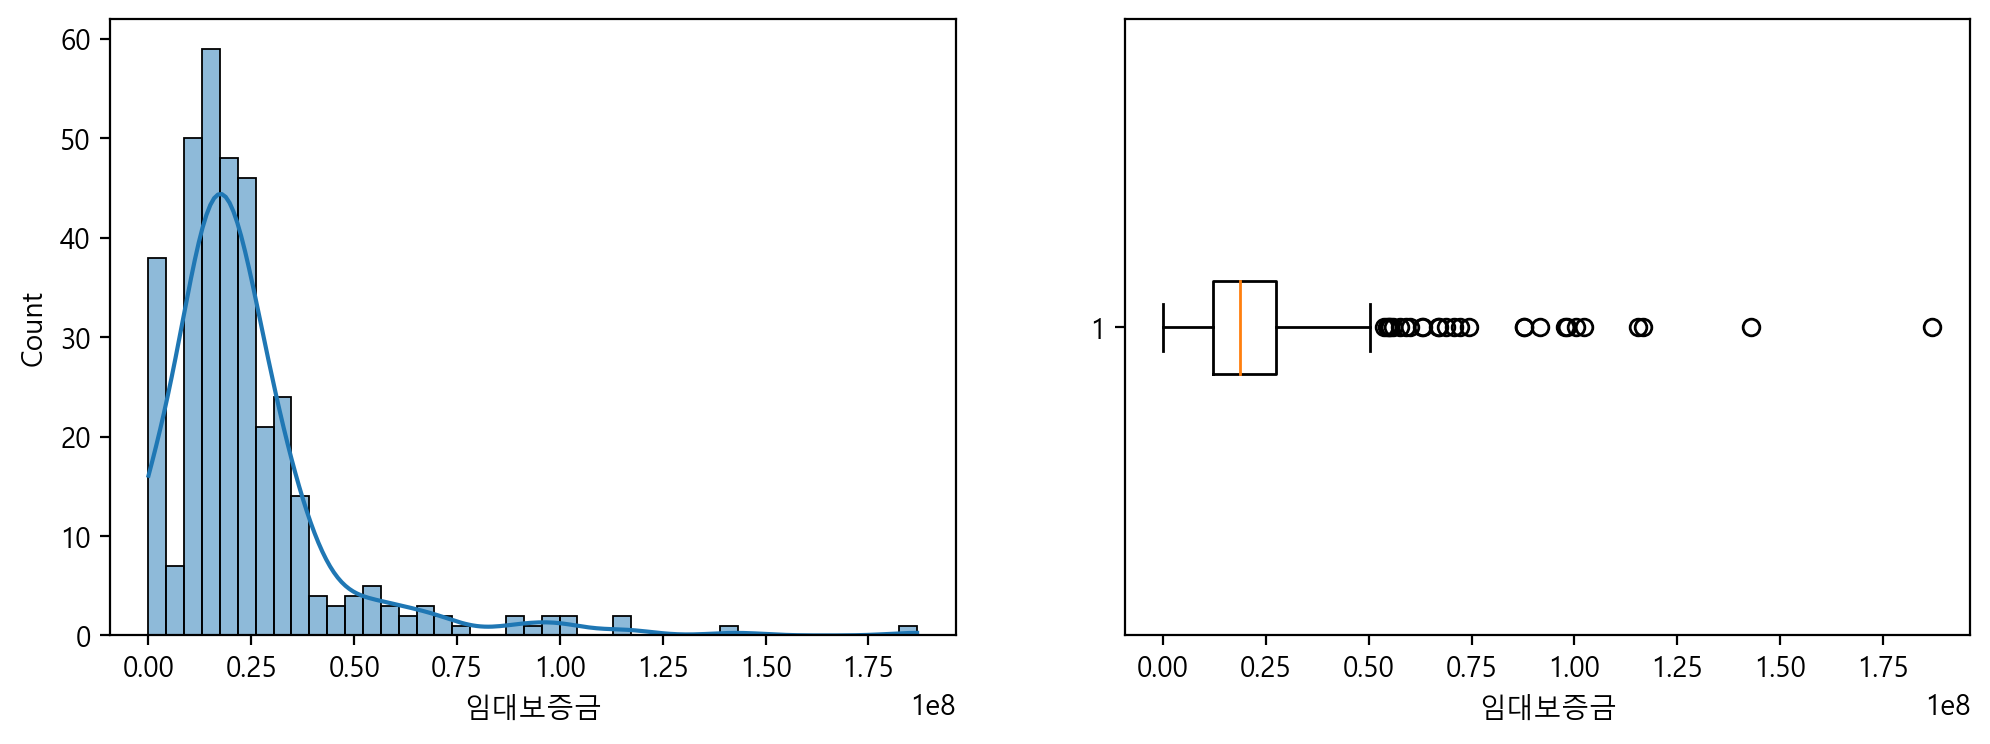

In [39]:
plotMaker(df, '임대보증금')

In [40]:
# 1. 임대료가 1 미만인 경우: 36
condition1 = df['임대료'] < 1

# 2. 임대보증금이 1 미만인 경우: 36
condition2 = df['임대보증금'] < 1

# 3. 실차량수가 총세대수 * 3보다 큰 경우: 47
condition3 = df['실차량수'] > df['총세대수'] * 3

# 4. 임대료가 410,000을 초과하는 경우: 33
condition4 = df['임대료'] > 410000

# 5. 임대보증금이 50,000,000을 초과하는 경우: 28
condition5 = df['임대보증금'] > 50000000

# 모든 조건을 결합하여 해당하는 행을 제거
conditions = condition1 | condition2 | condition3 | condition4 | condition5
df = df.drop(df[conditions].index).reset_index(drop=True)

# 결과 확인
df.shape

(256, 23)

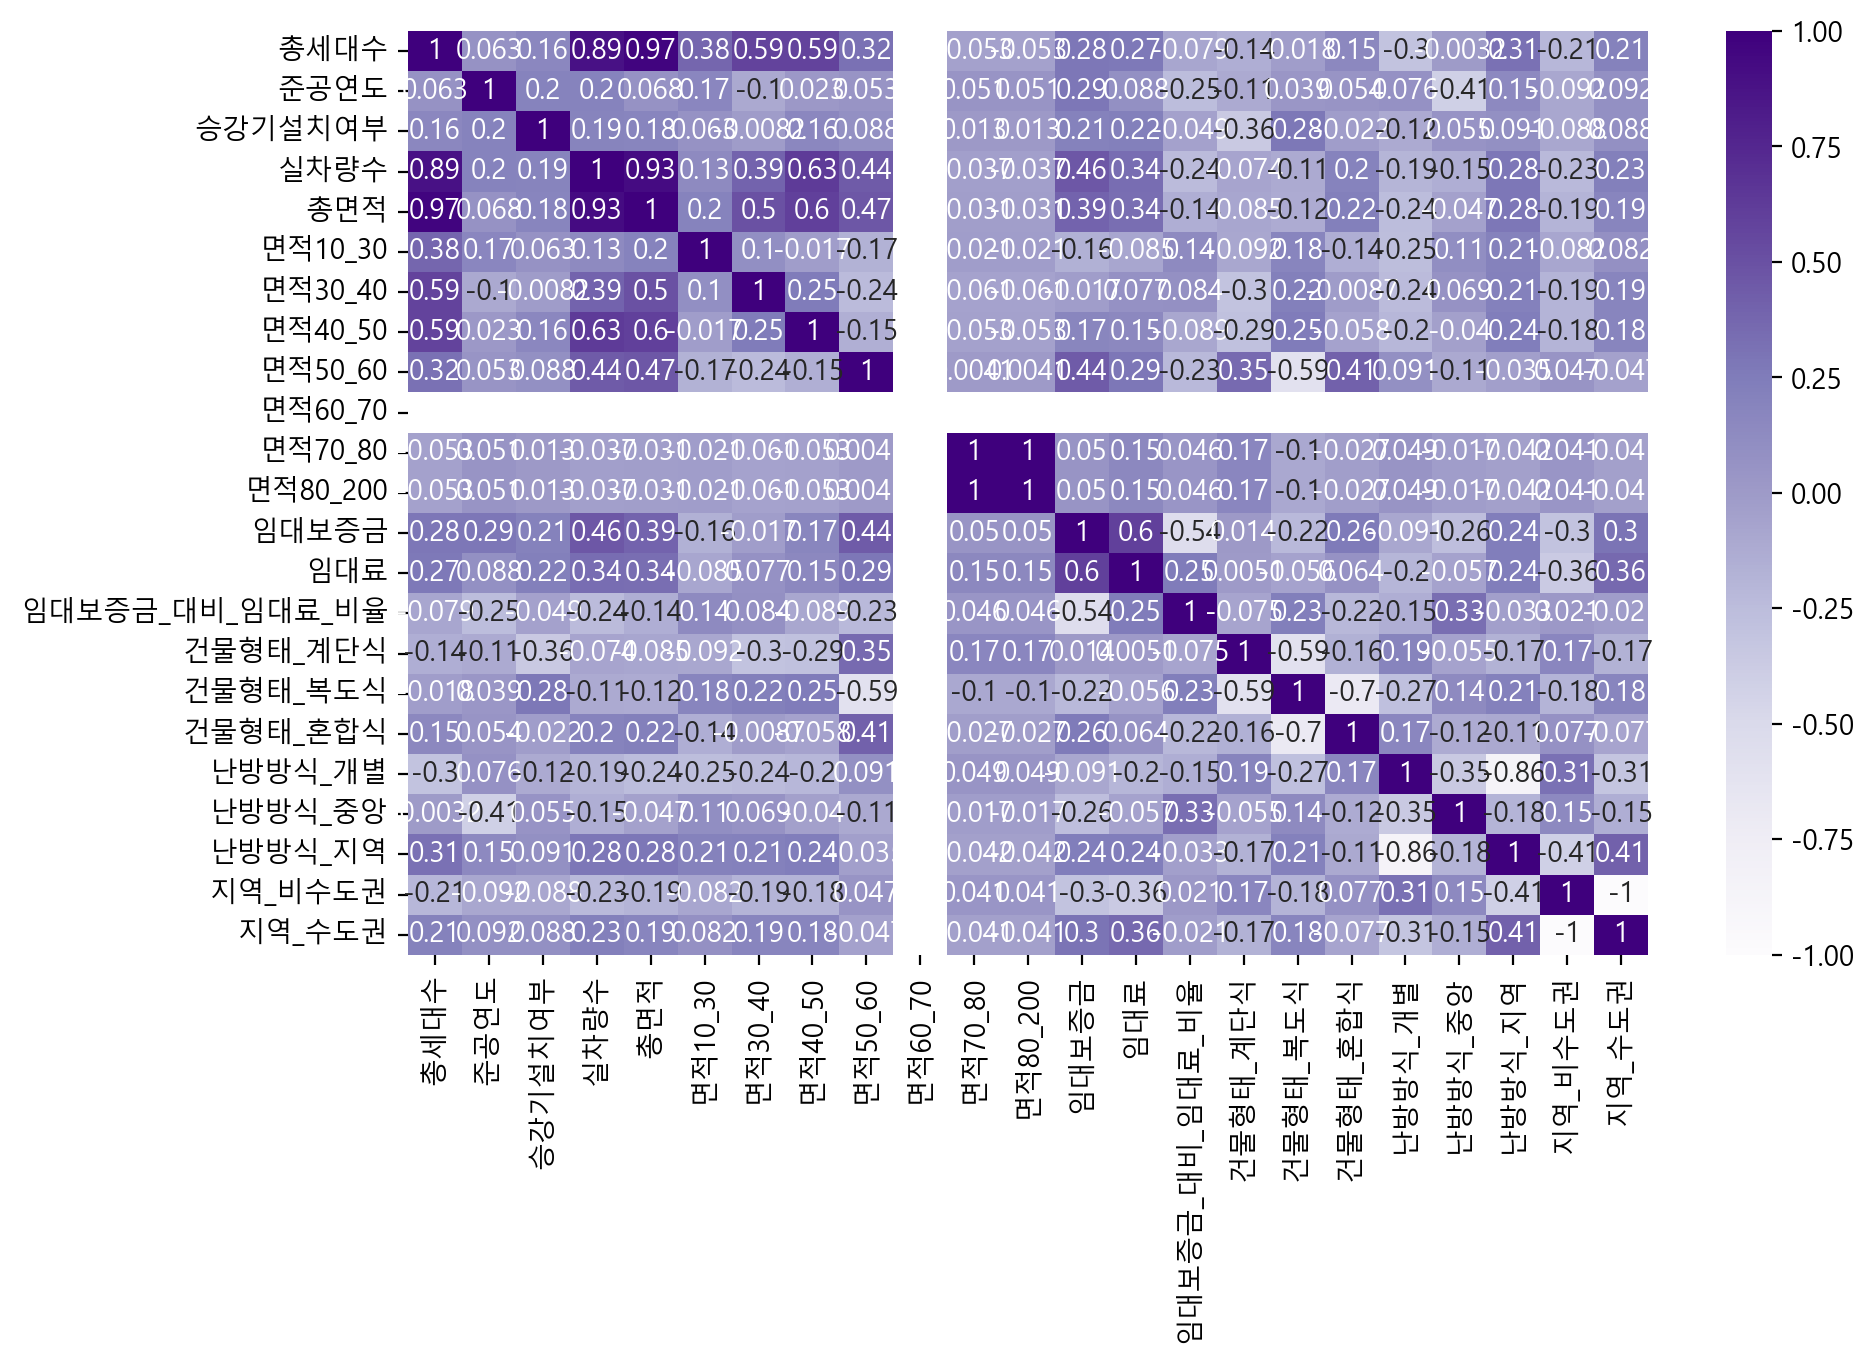

In [41]:
plt.figure(figsize = (10, 6))
sns.heatmap(df.corr(), 
            annot=True, cmap = 'Purples')
plt.show()

In [42]:
import scipy.stats as spst

def plotMaker3(target, x, y):
    result = spst.pearsonr(target[x], target[y])

    print(f'{x}와 {y}의 상관계수 r : {result[0]}')
    print(f'p-value : {result[1]}\n')

    sns.scatterplot(x=target[x], y=target[y])
    
    plt.grid(True)
    plt.title(f'Scatter plot between {x} and {y}')
    plt.show()

In [43]:
df.head()

,총세대수,준공연도,승강기설치여부,실차량수,총면적,면적10_30,면적30_40,면적40_50,면적50_60,면적60_70,...,임대료,임대보증금_대비_임대료_비율,건물형태_계단식,건물형태_복도식,건물형태_혼합식,난방방식_개별,난방방식_중앙,난방방식_지역,지역_비수도권,지역_수도권
0,756,2016,1,902,62104.7498,0,0,0,756,0,...,360990.158730,0.010588,1,0,0,1,0,0,1,0
1,280,2013,1,316,26784.9051,0,0,0,168,0,...,319762.879377,0.012054,1,0,0,1,0,0,1,0
2,528,2018,1,619,42874.5011,0,0,0,528,0,...,185040.000000,0.005625,1,0,0,1,0,0,1,0
3,559,1992,1,307,32190.3600,0,292,267,0,0,...,186414.150268,0.011240,0,1,0,0,0,1,0,1
4,870,1995,1,626,48133.7400,0,870,0,0,0,...,209322.804598,0.012462,0,1,0,0,1,0,0,1


임대료와 실차량수의 상관계수 r : 0.3419248780577816
p-value : 1.9753427422377276e-08



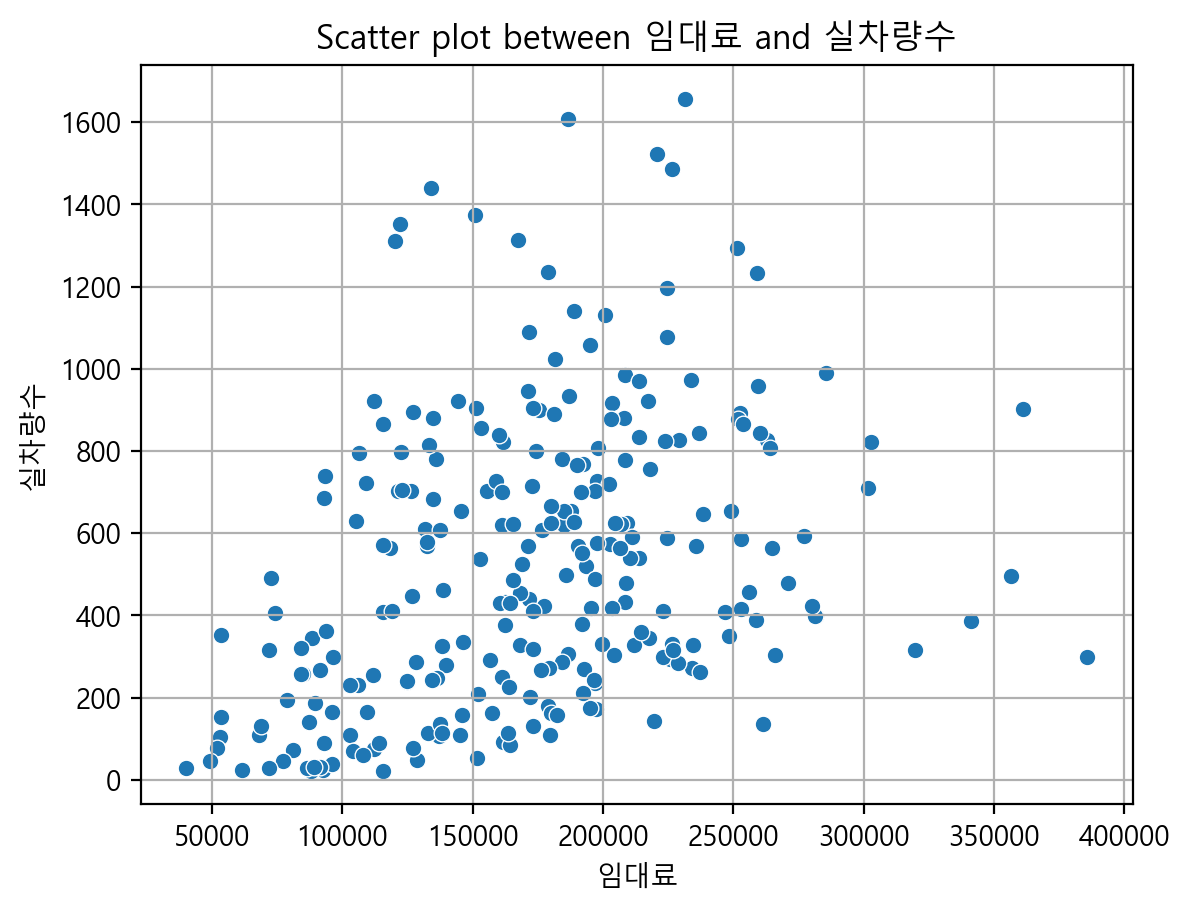

임대보증금와 실차량수의 상관계수 r : 0.46192760424847534
p-value : 6.17777603898831e-15



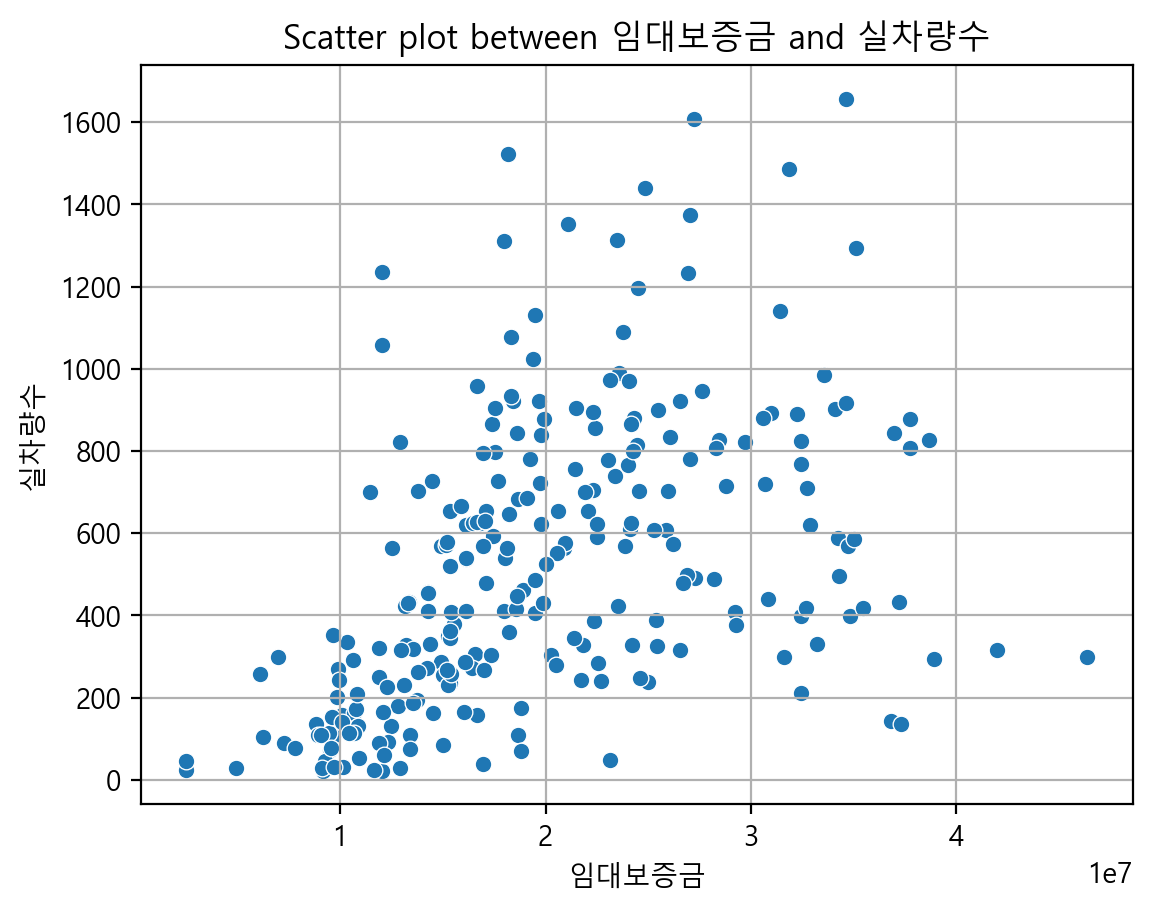

총세대수와 실차량수의 상관계수 r : 0.8871027174652721
p-value : 2.9342720572243563e-87



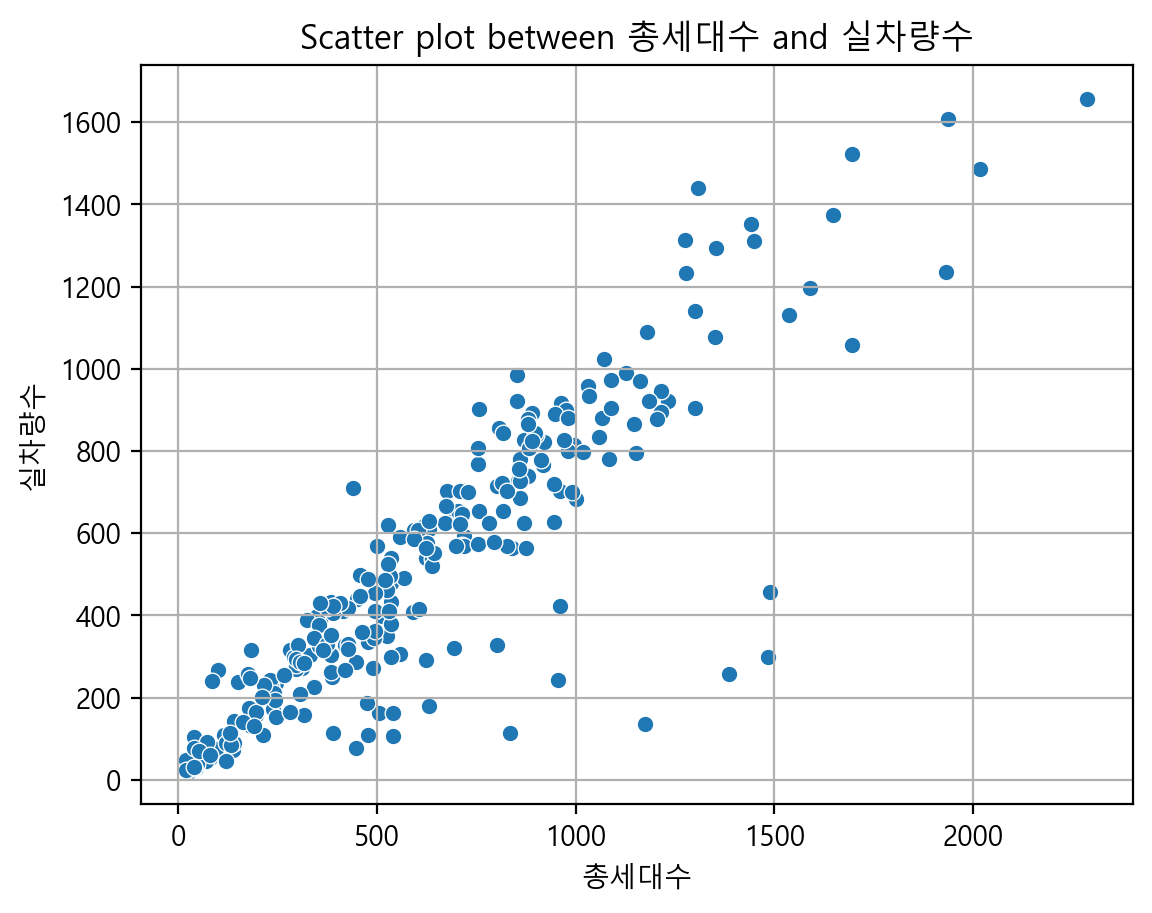

총면적와 실차량수의 상관계수 r : 0.9296283308111528
p-value : 4.029054928105678e-112



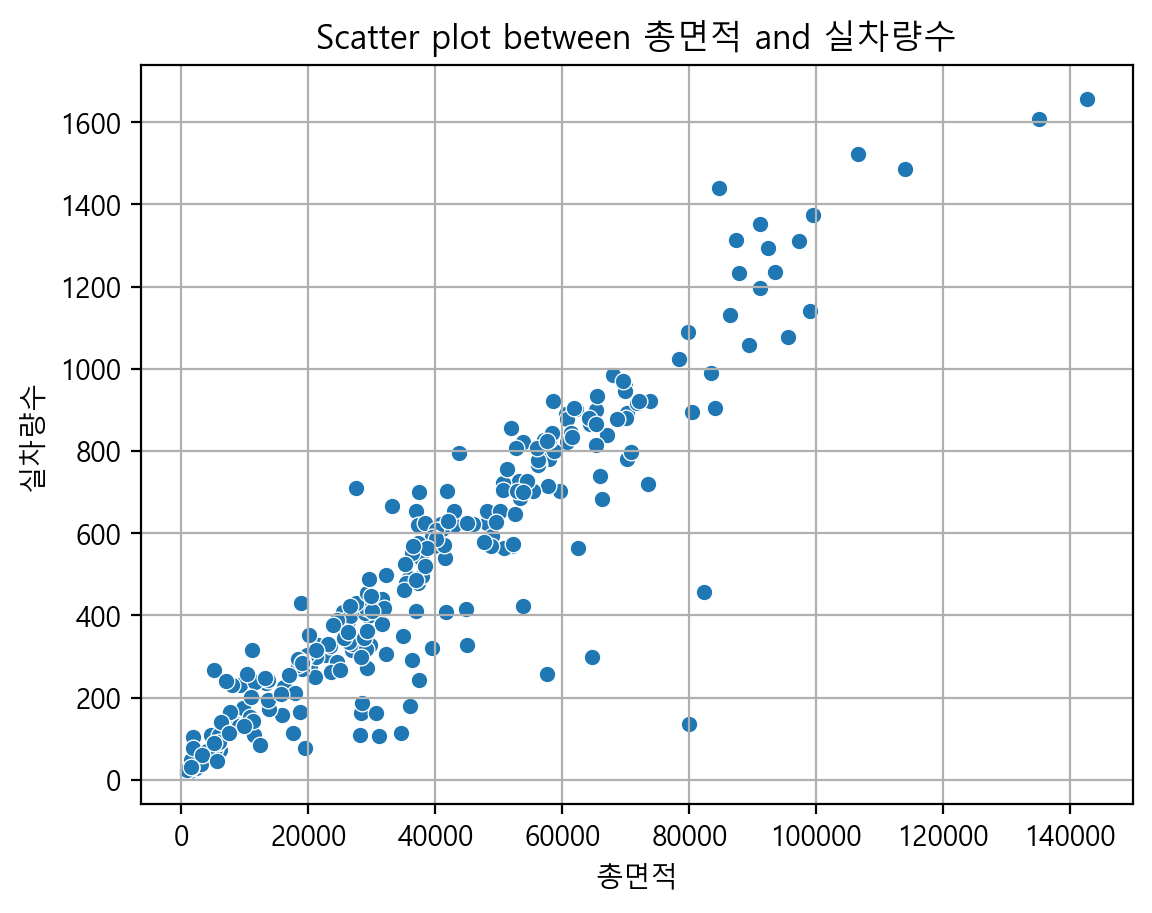

In [44]:
def plotMultiplePairs(target, x_vars, y_var):
    for x in x_vars:
        plotMaker3(target, x, y_var)

x_variables = ['임대료', '임대보증금', '총세대수', '총면적']
y_variable = '실차량수'

plotMultiplePairs(df, x_variables, y_variable)

In [45]:
df.columns

Index(['총세대수', '준공연도', '승강기설치여부', '실차량수', '총면적', '면적10_30', '면적30_40',
       '면적40_50', '면적50_60', '면적60_70', '면적70_80', '면적80_200', '임대보증금', '임대료',
       '임대보증금_대비_임대료_비율', '건물형태_계단식', '건물형태_복도식', '건물형태_혼합식', '난방방식_개별',
       '난방방식_중앙', '난방방식_지역', '지역_비수도권', '지역_수도권'],
      dtype='object')

In [46]:
area_variables = ['면적10_30', '면적30_40', '면적40_50', '면적50_60', '면적60_70', '면적70_80', '면적80_200']  

def plot_area_distribution_subplots(target, variables):
    fig, axes = plt.subplots(3, 3, figsize=(15, 12))
    
    for i, var in enumerate(variables):
        row = i // 3
        col = i % 3
        
        sns.histplot(target[var], kde=True, bins=20, ax=axes[row, col])
        axes[row, col].set_title(f'Distribution of {var}')
    

    for j in range(len(variables), 9):
        fig.delaxes(axes[j // 3, j % 3])

    plt.tight_layout()
    plt.show()

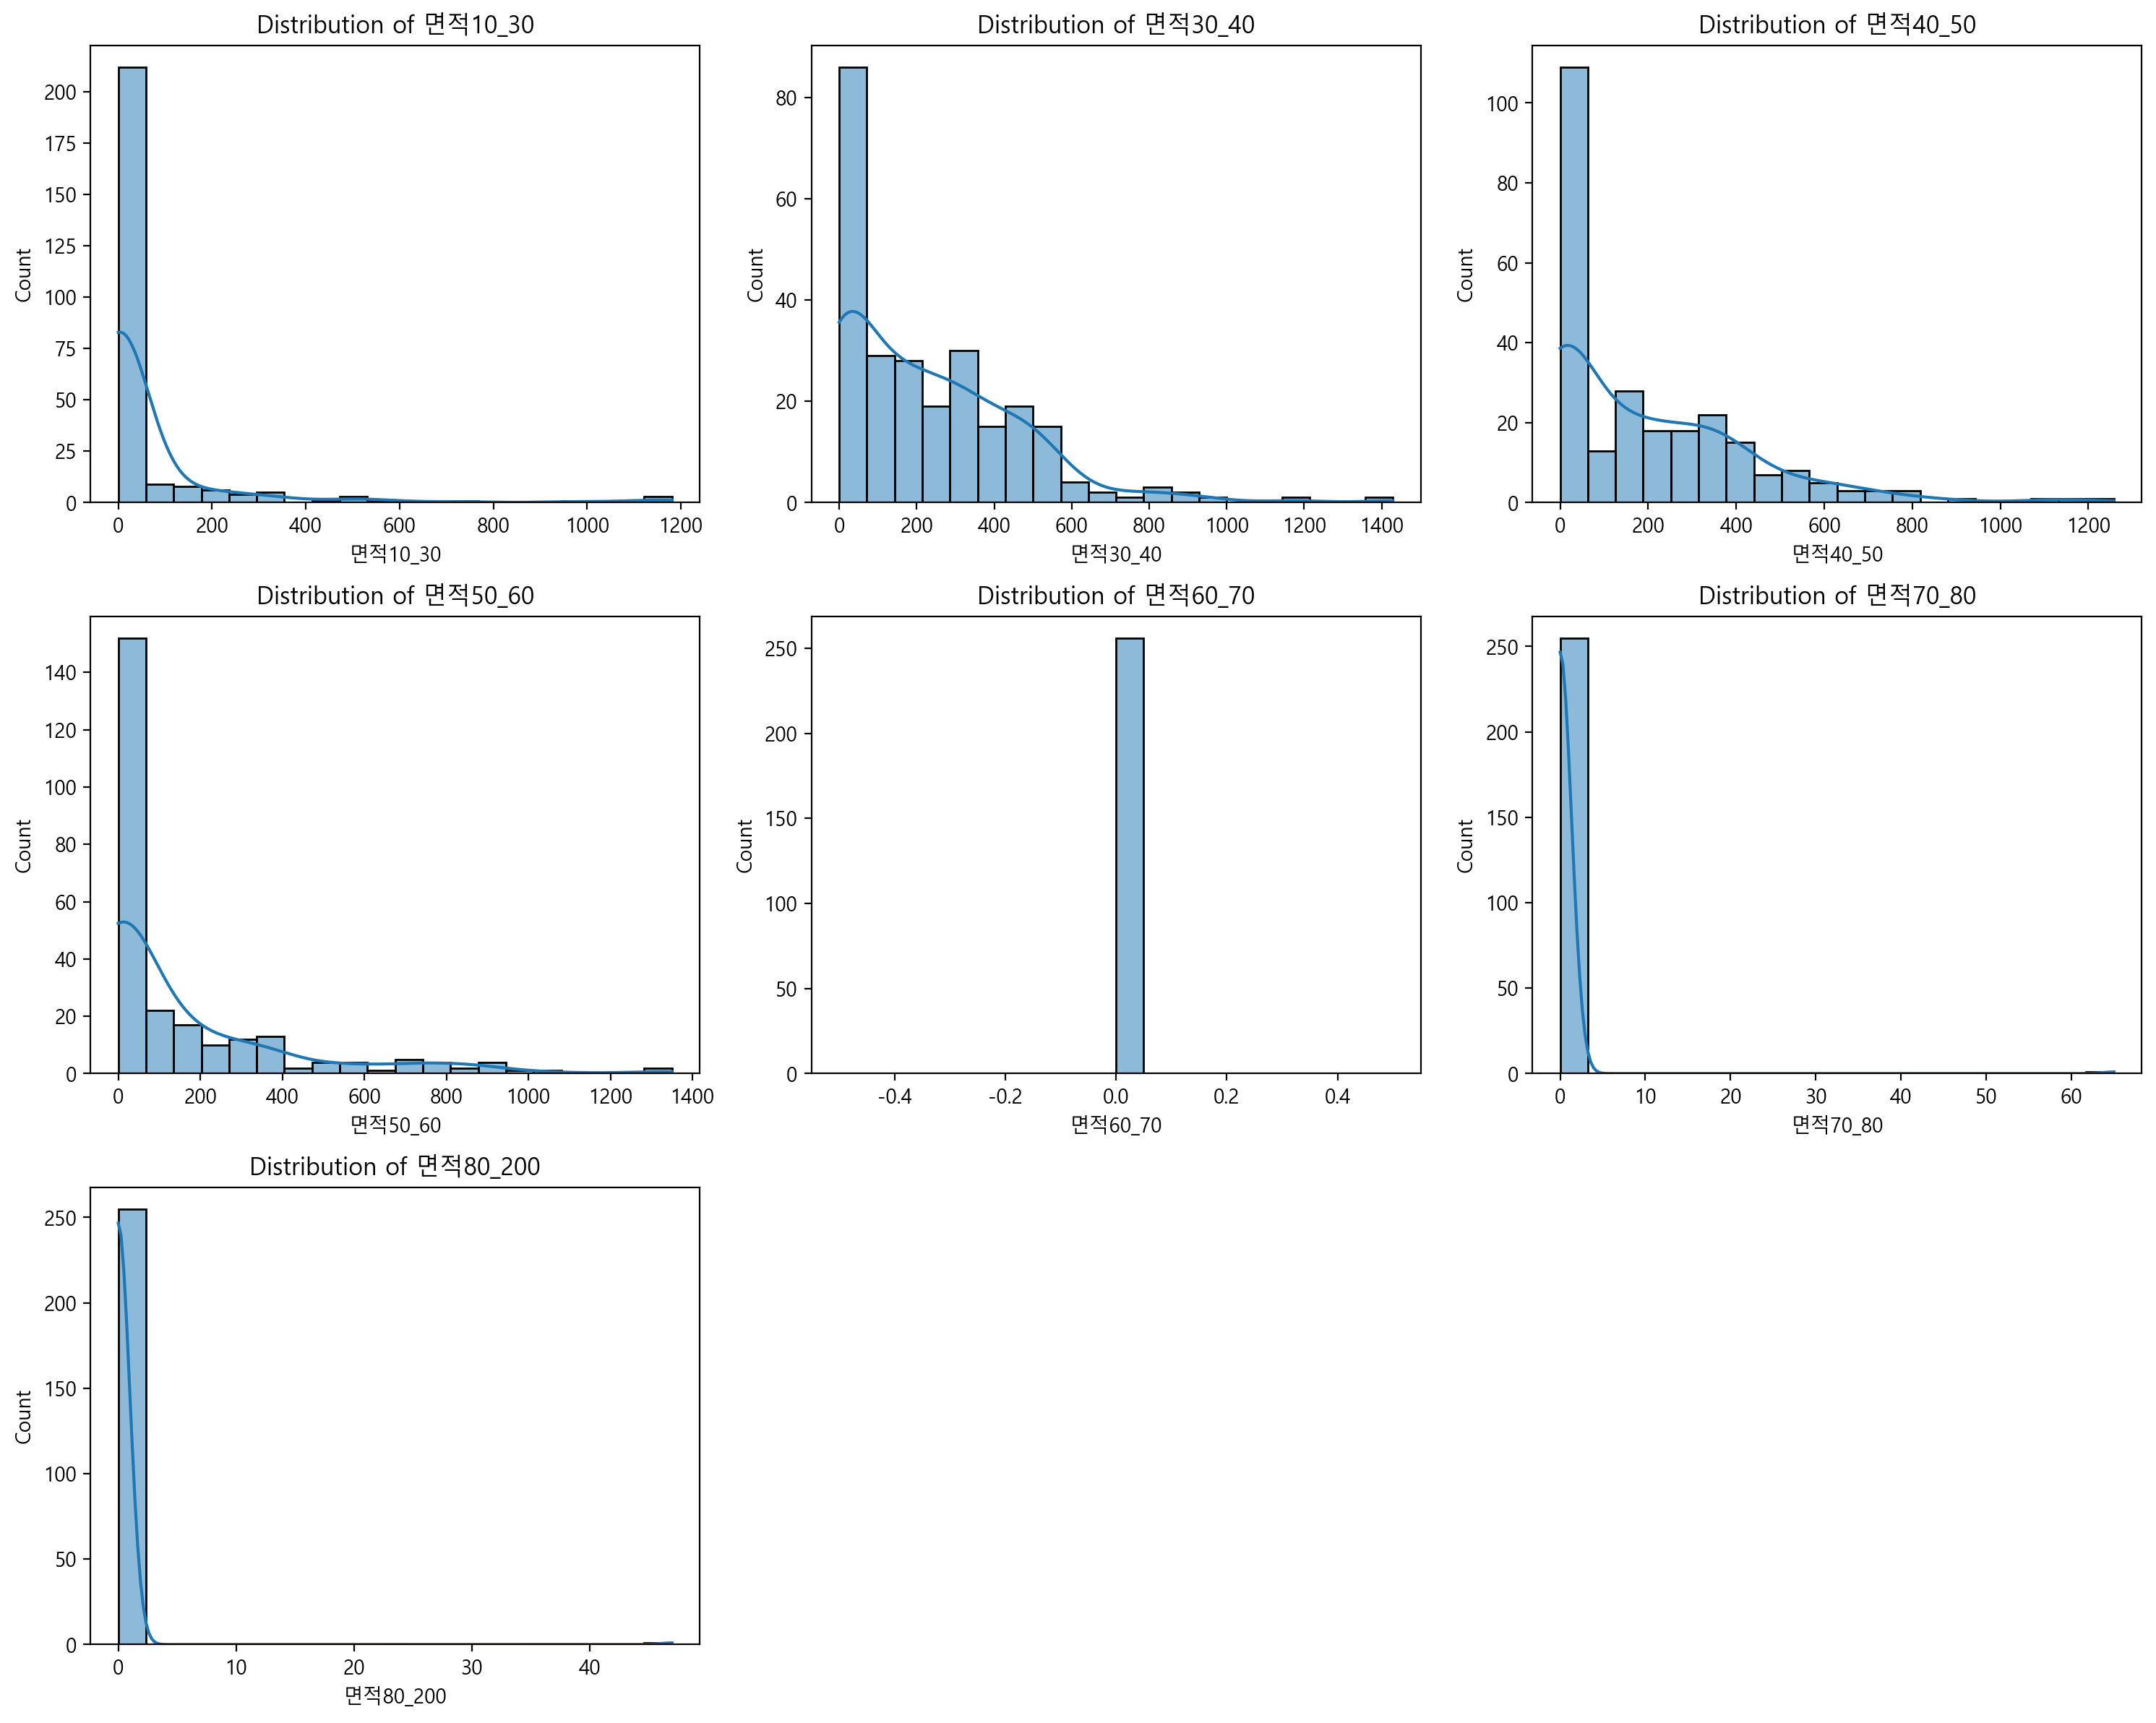

In [47]:
# 함수 호출
plot_area_distribution_subplots(df, area_variables)

- 이전 규정에 따라 50㎡ 이상의 집들은 공공건설임대주택에 해당되지 않으므로 50㎡ 이상의 집들은 공공건설임대주택이 아닐 가능성이 높다는 결론을 도출
- 따라서, 이상치를 제거한 데이터가 공공건설임대주택과 일치하는 데이터로 예상할 수 있음

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256 entries, 0 to 255
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   총세대수             256 non-null    int64  
 1   준공연도             256 non-null    int32  
 2   승강기설치여부          256 non-null    int64  
 3   실차량수             256 non-null    int64  
 4   총면적              256 non-null    float64
 5   면적10_30          256 non-null    int64  
 6   면적30_40          256 non-null    int64  
 7   면적40_50          256 non-null    int64  
 8   면적50_60          256 non-null    int64  
 9   면적60_70          256 non-null    int64  
 10  면적70_80          256 non-null    int64  
 11  면적80_200         256 non-null    int64  
 12  임대보증금            256 non-null    float64
 13  임대료              256 non-null    float64
 14  임대보증금_대비_임대료_비율  256 non-null    float64
 15  건물형태_계단식         256 non-null    uint8  
 16  건물형태_복도식         256 non-null    uint8  
 17  건물형태_혼합식        

In [49]:
# 파일로 저장
joblib.dump(df, 'df.pkl')

['df.pkl']